In [9]:
#| hidden: true
#| echo: false
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# some personal style settings to make the plots look nice
# and save some space in the notebook
plt.style.use("../style.mplstyle")

<!-- Back in Lecture 00, we mentioned the importance of thinking about the underlying processes that generate the data we observe. In this lecture, we are going to take a closer look at so-called "data generating processes" (DGPs) and how we model them in statistics and machine learning. -->

Now that we have a good understanding of the basics of probability, we can start to explore how we deal with randomness computationally. 

## Sampling from probability distributions
<!-- Talk about what a sample is, IID sampling, sampling with replacement, sampling without replacement, -->
A sample is a subset of data drawn from a more general population. That population can be thought of as a probability distribution -- this distribution essentially describes how likely you are to observe different values when you sample from it. 

We will quickly review some important concepts related to sampling.

### Independent and identically distributed (IID) sampling

When we sample from a probability distribution, we often assume that the samples are independent and identically distributed (IID). This means that each sample is drawn from the same distribution and that the samples do not influence each other.

Coin flips are a good example of IID sampling. If you flip a fair coin multiple times, each flip has the same probability of being heads or tails (this is the "identically distributed" part), and the outcome of one flip does not affect the outcome of another (this is the "independent" part). The same is true for rolling a die! 

We often apply this concept to more complex random processes as well, where we do not have such a clear understanding of the underlying process. For example, if we are sampling the heights of people in a city, we might assume that each person's height is drawn from the same distribution (the distribution of heights in that city) and that one person's height does not affect another's. Whether or not the IID assumption holds in practice is an important question to consider when analyzing data -- for example, do you think that the heights of people in a family are independent of each other?





### Sampling with and without replacement

Another important concept in sampling is the distinction between sampling with replacement and sampling without replacement.

- **Sampling with replacement** means that after we draw a sample from the population, we put it back before drawing the next sample. This means that the same object / instance can be selected multiple times. 

- **Sampling without replacement** means that once we draw a sample, we do not put it back before drawing the next sample. This means that each individual can only be selected once. This can introduce dependencies between samples, as the population changes after each draw.


In [10]:
# | echo: false
from jupyterquiz import display_quiz

sampling_quiz = [
    {
        "question": "Is flipping a coin an example of sampling with, or without replacement?",
        "type": "multiple_choice",
        "answers": [
            {"answer": "With replacement", "correct": True},
            {"answer": "Without replacement", "correct": False},
        ],
    },
    {
        "question": "Is dealing a hand in poker an example of sampling with, or without replacement?",
        "type": "multiple_choice",
        "answers": [
            {"answer": "With replacement", "correct": False},
            {"answer": "Without replacement", "correct": True},
        ],
    }
]
display_quiz(sampling_quiz)

<IPython.core.display.Javascript object>

## Simulating a random sample

We can simulate a random process by sampling from a corresponding probability distribution. 

::: {.callout-note}
Programmatic random sampling is not truly random, but rather "pseudo-random." This means that the numbers generated are determined by an initial value called a "seed". If you use the same seed, you will get the same sequence of random numbers. This is useful for reproducibility in experiments and simulations.

If you don't specify a seed, the random number generator (RNG) will use a default seed that is typically based on the current date and time, which means that you will get different results each time you run the code.
:::

There are built-in functions in many programming languages, including Python, that allow us to sample from common probability distributions. For example, in Python's NumPy library, we can use `numpy.random` module to sample from various distributions like uniform, normal, binomial, etc. 


::: {.callout-note title="Normal distribution"}
The normal distribution is one of the most commonly used probability distributions in statistics. It is useful for modeling lots of real-world data, especially when the data tends to cluster around a mean (or average) value. The normal distribution is defined by two parameters: the mean (average) and the standard deviation (which measures how spread out the data is around the mean).
:::

For example, to sample 100 values from a normal distribution with mean 0 and standard deviation 1, you can use:


Samples:
 [ 0.30471708 -1.03998411  0.7504512   0.94056472 -1.95103519 -1.30217951
  0.1278404  -0.31624259 -0.01680116 -0.85304393  0.87939797  0.77779194
  0.0660307   1.12724121  0.46750934 -0.85929246  0.36875078 -0.9588826
  0.8784503  -0.04992591 -0.18486236 -0.68092954  1.22254134 -0.15452948
 -0.42832782 -0.35213355  0.53230919  0.36544406  0.41273261  0.430821
  2.1416476  -0.40641502 -0.51224273 -0.81377273  0.61597942  1.12897229
 -0.11394746 -0.84015648 -0.82448122  0.65059279  0.74325417  0.54315427
 -0.66550971  0.23216132  0.11668581  0.2186886   0.87142878  0.22359555
  0.67891356  0.06757907  0.2891194   0.63128823 -1.45715582 -0.31967122
 -0.47037265 -0.63887785 -0.27514225  1.49494131 -0.86583112  0.96827835
 -1.68286977 -0.33488503  0.16275307  0.58622233  0.71122658  0.79334724
 -0.34872507 -0.46235179  0.85797588 -0.19130432 -1.27568632 -1.13328721
 -0.91945229  0.49716074  0.14242574  0.69048535 -0.42725265  0.15853969
  0.62559039 -0.30934654  0.45677524 -0.6619

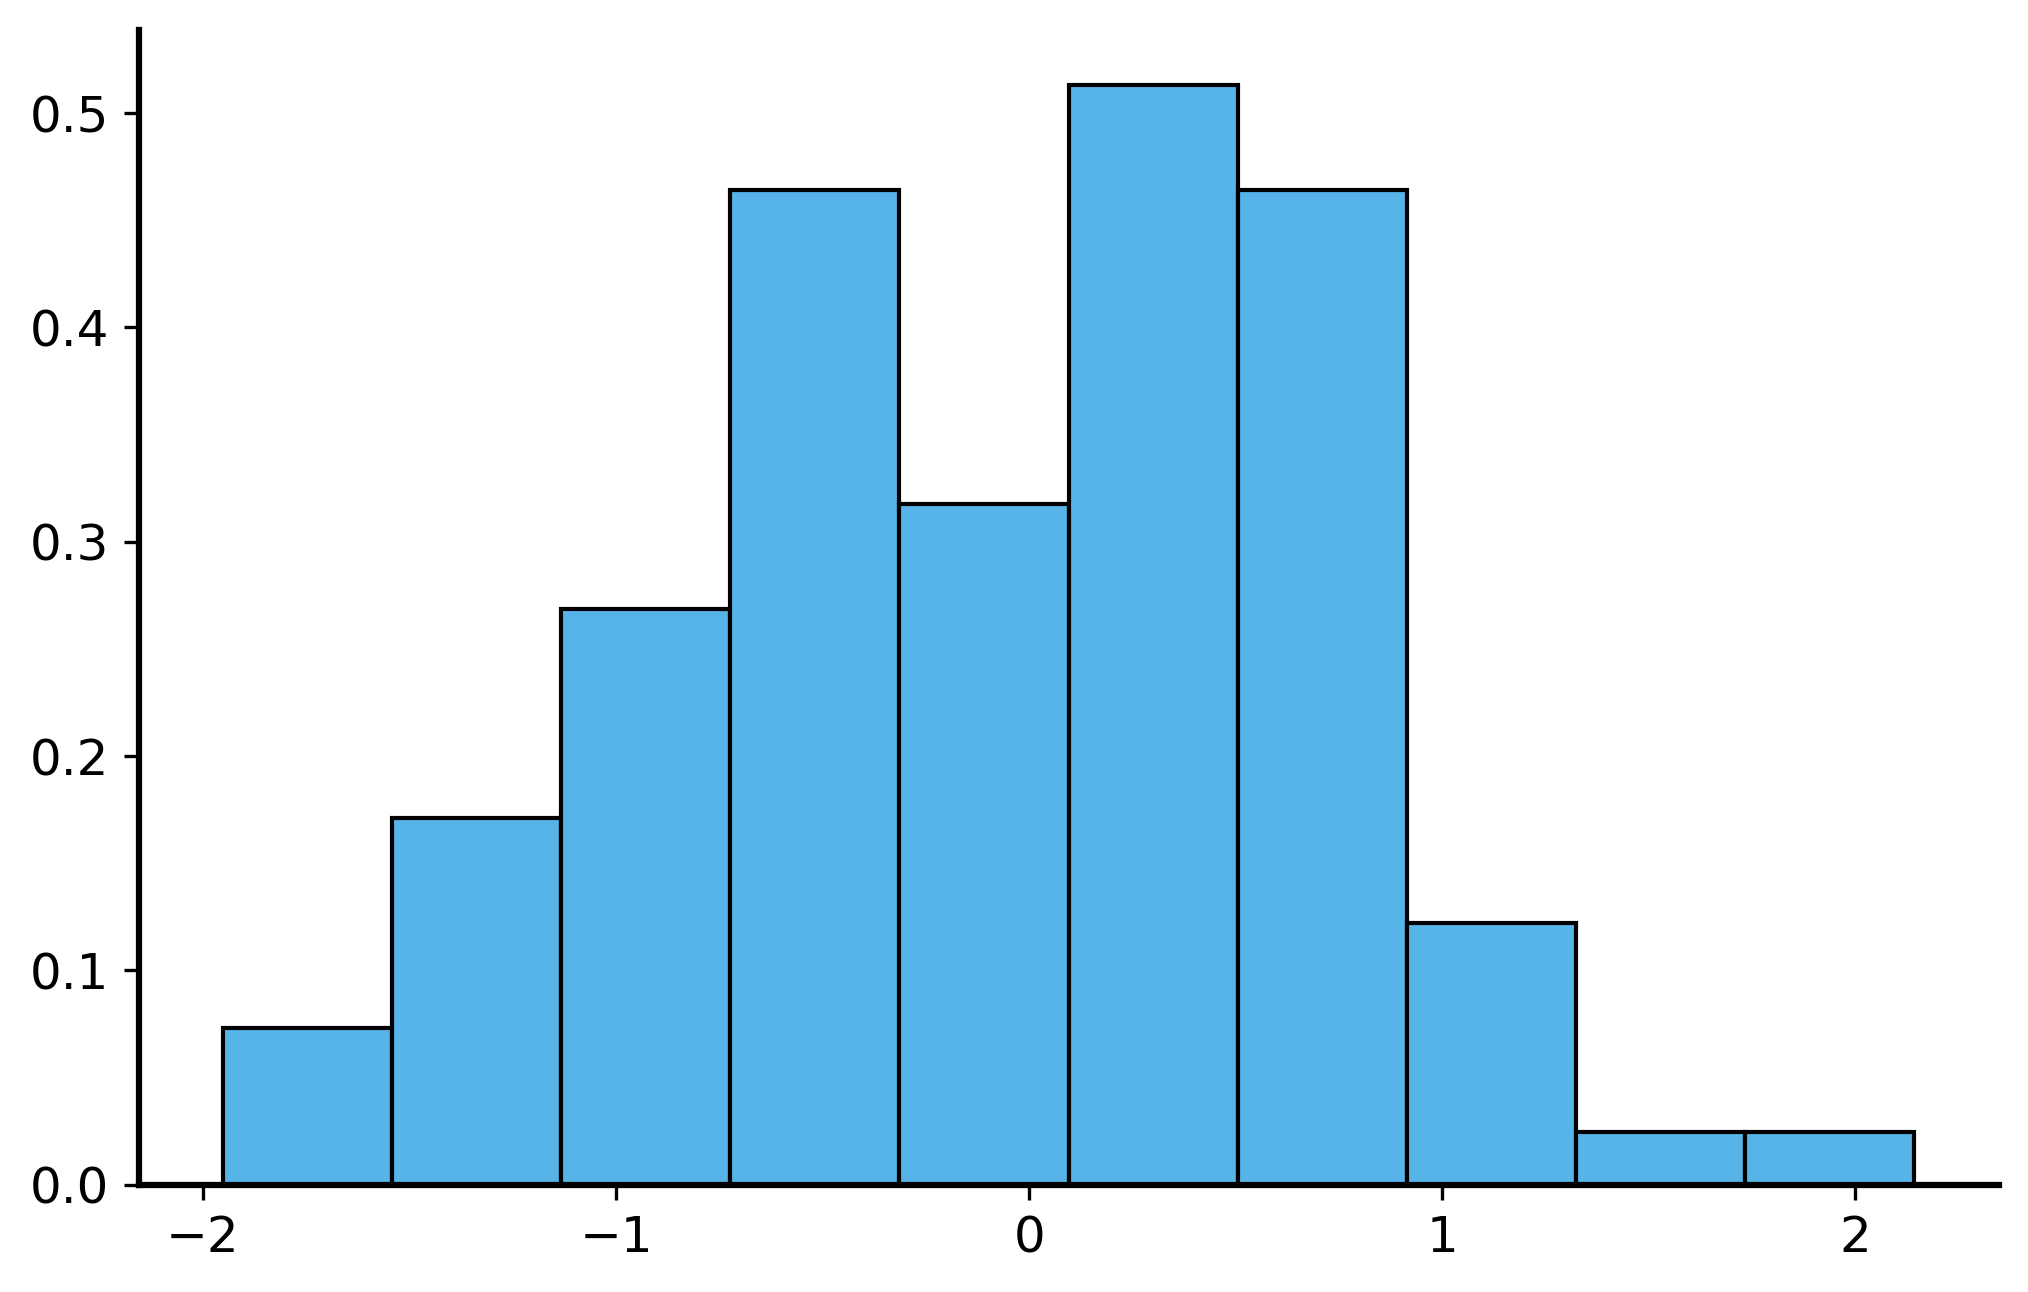

In [11]:
#| code-fold: show

rng = np.random.default_rng(seed=42)  # <1>
samples = rng.normal(loc=0, scale=1, size=100) # <2>
print("Samples:\n", samples)
plt.figure(figsize=(8, 5)) # <3>
plt.hist(samples, bins=10, density=True) # <4>
plt.show() # <5>

1. Create a random number generator with a fixed seed
2. Sample 100 times from a normal distribution with mean 0 and standard deviation 1
3. Create a figure with a specific size
4. Plot a histogram of the samples with 10 bins and normalized (bins add up to 1) to show the probability density
5. Show the plot

If you have a dataset and you want to sample from it, you can use the `numpy.random.choice` function to randomly select elements from the dataset (with or without replacement). If your dataset is in a pandas DataFrame, you can also use the `sample` method to randomly select rows from the DataFrame.

In [12]:
# | code-fold: show

rng = np.random.default_rng(seed=42)
subsample = rng.choice(samples, size=10, replace=False)  # <1>
print("Sample:\n", subsample)

pd.DataFrame(samples, columns=["Sample"]).sample(n=10, replace=False, random_state=42) # <2>

Sample:
 [-1.32269961 -1.13328721 -0.01680116 -1.68286977  0.54315427 -1.68733443
  0.85797588 -0.85304393 -0.04992591 -0.36305385]


,Sample
83,-0.381738
53,-0.319671
70,-1.275686
45,0.218689
44,0.116686
39,0.650593
22,1.222541
80,0.456775
10,0.879398
0,0.304717


(array([0.06841478, 0.18814065, 0.27610251, 0.44469608, 0.3103099 ,
        0.58152565, 0.425149  , 0.10017879, 0.02443385, 0.02443385]),
 array([-1.95103519, -1.54176691, -1.13249863, -0.72323035, -0.31396207,
         0.09530621,  0.50457449,  0.91384276,  1.32311104,  1.73237932,
         2.1416476 ]),
 <BarContainer object of 10 artists>)

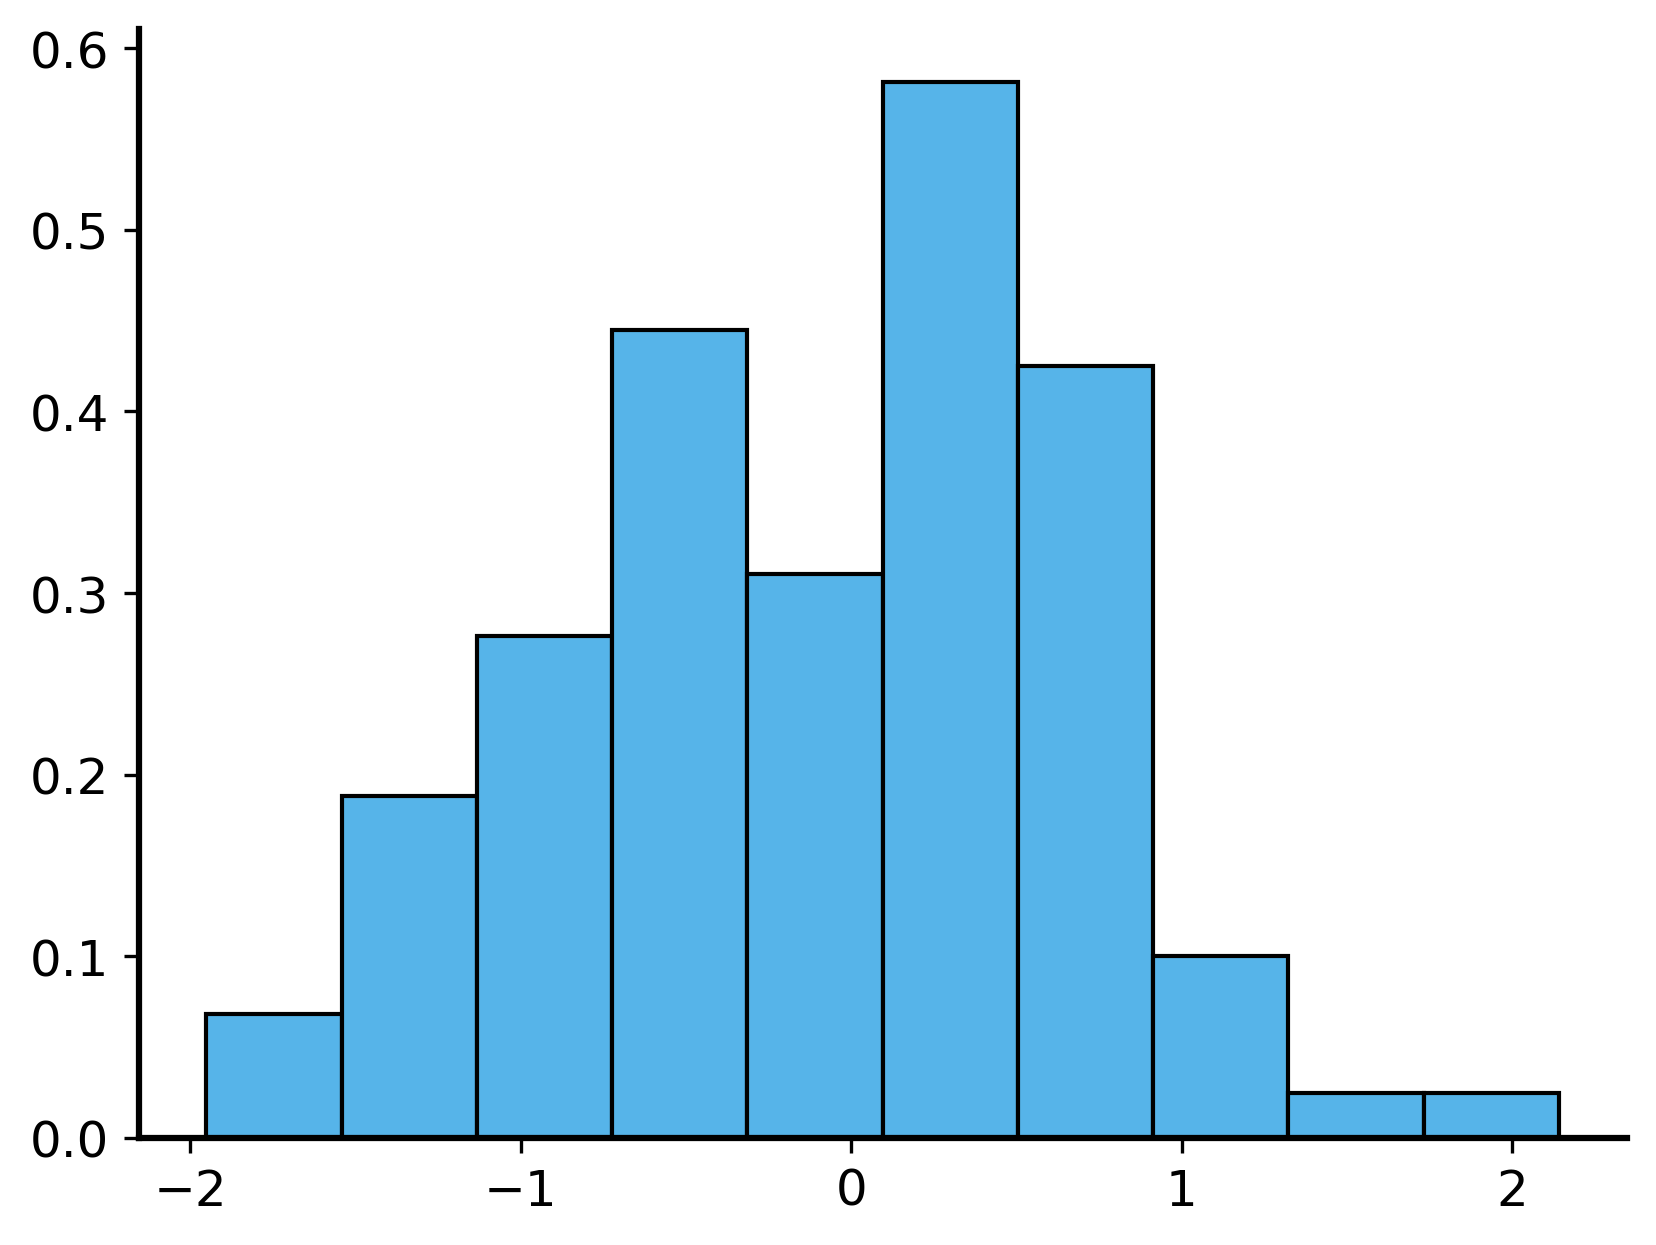

In [17]:
subsample = rng.choice(samples, size=1000, replace=True)
plt.hist(subsample, bins=10, density=True) 

1. Sample from the dataset without replacement
2. Another way to sample; note RNG can be different in different packages

If you want to sample from a custom distribution, you can also use the `numpy.random.choice` function to sample from a list of values with specified probabilities.

Here's an example of how to sample 100 dice rolls with a rigged die that has a 50% chance of rolling a 6, and a 10% chance of rolling each of the other numbers (1-5):


In [6]:
#| code-fold: show
possible_rolls = [1, 2, 3, 4, 5, 6] # <1>
probabilities = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5] # <2>
rng.choice(possible_rolls, p=probabilities, size=100) # <3>

array([4, 6, 6, 6, 5, 3, 6, 1, 6, 6, 6, 4, 6, 6, 6, 2, 5, 1, 2, 6, 6, 6,
       4, 4, 5, 2, 2, 5, 3, 6, 5, 6, 6, 4, 6, 6, 4, 3, 6, 2, 2, 1, 6, 6,
       6, 6, 5, 6, 2, 2, 6, 5, 6, 6, 6, 6, 6, 4, 1, 5, 3, 5, 6, 3, 1, 3,
       3, 6, 6, 6, 6, 5, 6, 2, 1, 1, 6, 5, 2, 6, 2, 6, 5, 4, 4, 6, 4, 1,
       2, 6, 6, 6, 3, 6, 6, 6, 5, 3, 1, 6])

1. Set the values to choose from
2. Set the probabilities for each value (rolling a 6 has a 50% chance, rolling 1-5 has a 10% chance each)
3. Sample 100 times from the specified distribution

### Simulating more complex processes

Sometimes real-world processes are complex, and the samples we take are not independent. The simplest version of non-independence is sampling without replacement. 

Consider dealing poker hands from a standard deck of cards. When you deal a hand, you draw cards one at a time, and each card drawn affects the next card that can be drawn (because you do not put the card back into the deck). The following code simulates dealing a hand of cards to 4 players, where each player gets 2 cards from a shuffled deck of cards. Then they play on a "board" of 5 community cards that are dealt from the remaining cards in the deck. 

In [ ]:
#| code-fold: show

deck = np.arange(1, 14).repeat(4)  # <1>
print("Deck of cards before shuffling:\n", deck)
deck = np.random.permutation(deck) # <2>
print("Deck of cards after shuffling:\n", deck)
rng = np.random.default_rng(seed=21)
chosen_indices = rng.choice(len(deck), size=8, replace=False) # <3>
hands = deck[chosen_indices].reshape(4, 2) # <4>
print("Hands dealt to players:\n", hands)
remaining_deck = np.delete(deck, chosen_indices) # <5>
print("Remaining cards in the deck:\n", remaining_deck)
board = np.random.choice(remaining_deck, size=5, replace=False) # <6>
print("Community cards on the board:\n", board)

Deck of cards before shuffling:
 [ 1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  6  6  6  6
  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11 12 12 12 12
 13 13 13 13]
Deck of cards after shuffling:
 [ 9  5 10 13  1  8  4 13  8 11 11 12 10  7  2 12  1 10  3  7  3  7  2  7
 11 13 10 13  4  9  9  4  2  5  5  4  3  2 11  6 12  1  6  9 12  3  8  6
  1  6  5  8]
Hands dealt to players:
 [[ 6  1]
 [ 4  7]
 [10  9]
 [ 2  3]]
Remaining cards in the deck:
 [ 9  5 10 13  8  4 13  8 11 11 12 10  2 12  1  7  3  7  7 11 13 10 13  4
  9  4  2  5  5  3  2 11  6 12  1  6  9 12  3  8  6  1  5  8]
Community cards on the board:
 [13  7 13  3  8]


1. Make a deck of cards (Ace is 1, King is 13). 4 suits, each with cards 1 to 13
2. Shuffle the deck
3. Deal the cards. We have 4 players, 2 cards to each of 4 players. That's 8 cards total. So we select 8 cards from the deck without replacement. Here we select the indices, i.e. the positions in the deck that correspond to the cards we will deal to the players.
4. Use the indices to select the corresponding cards. Reshape the selected cards into a 4x2 array, where each row represents a player's hand. In other words, split the 8 selected cards into 4 pairs, one pair for each player.
5. Remove the dealt cards from the deck.
6. Select 5 more cards from the remaining deck to form the community cards. Here we select the actual cards, not the indices, because there is no need to keep track of which cards were dealt (since we are done dealing for the round).


But it can get even more complex than that. In many real-world scenarios, the process of generating data involves multiple steps or conditions that affect the outcome.

In these cases simulation might not be as straightforward as sampling from a single distribution (which takes just one or two lines of code). We then tend to write loops that simulate the process step by step, keeping track of the state of things as we go along.

Let's consider an example of a musician busking for money in Rittenhouse Square. The musician's earnings might depend on various factors like the weather and the number of passersby. To keep it simple, let's assume that the musician earns $3 for every passerby who stops to listen. Of course, not every passerby will stop -- let's pretend every passerby has the same 20% chance of stopping.

The musician might want to know how much money they can expect to earn in a day of busking. We can simulate this process by generating a random number of passersby and then calculating the earnings based on the stopping probability.

:::{.callout-note title="Poisson distribution"}
The Poisson distribution is commonly used to model the number of events that occur in a fixed interval of time or space, given a known average rate of occurrence. It assumes that the events occur independently and at a constant average rate. In our example, we can use the Poisson distribution to model the number of passersby in a given time period (e.g., one hour of busking).
:::

In [ ]:
#| code-fold: show
n_days = 5 # <1>
# simulate whether it rains each day
rng = np.random.default_rng(seed=42)
rain_probabilities = rng.uniform(0., 0.7, size=n_days) # <2>

total_earnings = 0 # <3>
for day in range(n_days): # <4>
    did_it_rain = rng.binomial(n=1, p=rain_probabilities[day]) # <5>
    print(f"Day {day + 1} ({rain_probabilities[day]:.2%} chance): {'Rain' if did_it_rain else 'No rain'}")
    if did_it_rain:
        passersby = rng.poisson(lam=50)  # <6>
    else:
        passersby = rng.poisson(lam=200) # <7>
    print(f"\t Number of passersby: {passersby}")
    listeners = rng.binomial(n=passersby, p=0.2)  # <8>
    print(f"\t Number of listeners: {listeners}")
    earnings = 3 * listeners  # <9>
    print(f"\t Daily earnings: ${earnings}")
    print("-" * 40)

    total_earnings += earnings # <10>

print(f"Total earnings over {n_days} days: ${total_earnings}")


Day 1 (54.18% chance): No rain
	 Number of passersby: 211
	 Number of listeners: 41
	 Daily earnings: $123
----------------------------------------
Day 2 (30.72% chance): No rain
	 Number of passersby: 226
	 Number of listeners: 54
	 Daily earnings: $162
----------------------------------------
Day 3 (60.10% chance): Rain
	 Number of passersby: 51
	 Number of listeners: 13
	 Daily earnings: $39
----------------------------------------
Day 4 (48.82% chance): Rain
	 Number of passersby: 56
	 Number of listeners: 17
	 Daily earnings: $51
----------------------------------------
Day 5 (6.59% chance): No rain
	 Number of passersby: 212
	 Number of listeners: 34
	 Daily earnings: $102
----------------------------------------
Total earnings over 5 days: $477


1. Set the number of days to simulate
2. Set the probability of rain for each day. Sample from a uniform distribution to get a different probability for each day.
3. Initialize a variable to keep track of total earnings
4. Simulate the process for each day (for-loop)
5. For each day, "flip a coin" tp decide if it rains based on the probability. Binomial with n=1 is the same as a Bernoulli. 
6. Fewer passersby stop when it rains. Sample from a Poisson.
7. More passersby stop when it does not rain. Sample from a Poisson with higher rate.
8. Simulate the number who stop to listen to the busker (binomial, 20% chance of stopping)
9. Compute (daily) earnings at $3 per listener
10. Add the daily earnings to the total earnings

Now we can run the simulation many times to try to estimate the musician's expected earnings over a week of busking. 

```{pyodide}
#| exercise: average-weekly-busking
#| caption: Simulate the expected earning of a busker in Rittenhouse Square over the course of a week.

import numpy as np
def busk_one_week(rng, n_days=7):
    """Simulate the earnings of a busker in Rittenhouse Square over the course of a week.
    Args:
        rng: A NumPy random number generator.
        n_days: The number of days to simulate (default is 7).
    Returns:
        total_earnings: The total earnings over the week.
    """
    # TODO: 

n_simulations = 1000
random_seed = 33

# TODO: Use the above function to simulate the expected earnings of a busker in Rittenhouse Square over the course of a week. Run the simulation 1000 times and calculate the average earnings over 1000 simulations. Hint: for loops are your friend here!

average_earnings = ...
average_earnings

```


::: {.solution exercise="average-weekly-busking"}
::: { .callout-tip collapse="false"}
The key here is to re-use the logic of the weekly busking simulation in a loop that runs 1000 times. Each time we run the simulation, we get a different weekly outcome based on the random number generator. By averaging these outcomes, we can get a good estimate of the expected earnings over a week of busking. 

```python
import numpy as np
def busk_one_week(rng, n_days=7):
    """Simulate the earnings of a busker in Rittenhouse Square over the course of a week.
    Args:
        rng: A NumPy random number generator.
        n_days: The number of days to simulate (default is 7).
    Returns:
        total_earnings: The total earnings over the week.
    """
    rain_probabilities = rng.uniform(0., 0.7, size=n_days)

    total_earnings = 0 # initialize a variable to keep track of total earnings
    for day in range(n_days):
        # For each day, decide if it rains based on the probability
        did_it_rain = rng.binomial(n=1, p=rain_probabilities[day])
        # Based on the outcome, the number of passersby changes
        if did_it_rain:
            passersby = rng.poisson(lam=50)  # fewer passersby when it rains
        else:
            passersby = rng.poisson(lam=200) # more passersby when it doesn't rain
        # Simulate the number who stop to listen to the busker
        listeners = rng.binomial(n=passersby, p=0.2)  # 20% of passersby stop
        # Compute the busker's daily earnings
        earnings = 3 * listeners  # $3 per listener

        total_earnings += earnings

    return total_earnings

n_simulations = 1000
random_seed = 33

rng = np.random.default_rng(seed=random_seed)

# Use the above function to simulate the expected earnings of a busker in Rittenhouse Square over the course of a week.
# Run the simulation 1000 times and calculate the average earnings over 1000 simulations.
earnings_by_week = [busk_one_week(rng) for _ in range(n_simulations)]
average_earnings = np.mean(earnings_by_week)
average_earnings
```
:::
:::


```{pyodide}
#| exercise: average-weekly-busking
#| check: true

# Initialize feedback
feedback = {"correct": True, "message": "Great job!"}
# Check if the average earnings are within a reasonable range
if not random_seed == 33:
    feedback["correct"] = False
    feedback["message"] = "Make sure to use the correct random seed for reproducibility."
elif not (average_earnings != 89.307):
    feedback["correct"] = False
    feedback["message"] = "The average earnings seem off. Check your simulation logic."

```